In [1]:
#importing Libraries

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing data

df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')

In [3]:
#Showing the first 5 rows of data

df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
#Showing the last 5 rows of data

df.tail()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


In [5]:
#Creating a subset of the columns that i want to keep

df2 = df[['race', 'gender', 'time_in_hospital', 'number_outpatient'\
          ,'number_emergency', 'number_inpatient', 'diabetesMed', 'readmitted']]

df2.head()

,race,gender,time_in_hospital,number_outpatient,number_emergency,number_inpatient,diabetesMed,readmitted
0,Caucasian,Female,1,0,0,0,No,NO
1,Caucasian,Female,3,0,0,0,Yes,>30
2,AfricanAmerican,Female,2,2,0,1,Yes,NO
3,Caucasian,Male,2,0,0,0,Yes,NO
4,Caucasian,Male,1,0,0,0,Yes,NO


In [6]:
#column names

df2.columns

Index(['race', 'gender', 'time_in_hospital', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diabetesMed', 'readmitted'],
      dtype='object')

In [7]:
#checking to see if there are missing values

df2.isnull().sum()

race                 0
gender               0
time_in_hospital     0
number_outpatient    0
number_emergency     0
number_inpatient     0
diabetesMed          0
readmitted           0
dtype: int64

In [8]:
#All at once

df2.describe()

,time_in_hospital,number_outpatient,number_emergency,number_inpatient
count,101766.000000,101766.000000,101766.000000,101766.000000
mean,4.395987,0.369357,0.197836,0.635566
std,2.985108,1.267265,0.930472,1.262863
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000
75%,6.000000,0.000000,0.000000,1.000000
max,14.000000,42.000000,76.000000,21.000000


In [9]:
##a quick look

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   race               101766 non-null  object
 1   gender             101766 non-null  object
 2   time_in_hospital   101766 non-null  int64 
 3   number_outpatient  101766 non-null  int64 
 4   number_emergency   101766 non-null  int64 
 5   number_inpatient   101766 non-null  int64 
 6   diabetesMed        101766 non-null  object
 7   readmitted         101766 non-null  object
dtypes: int64(4), object(4)
memory usage: 6.2+ MB


In [10]:
#Count by gender

df2['gender'].value_counts()

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

In [11]:
####Removing unknown/invalid data

df1 = df2[(df2['gender'] != 'Unknown/Invalid') & (df2['race'] != '?')\
          & (df2['race'] != 'Other')]

df1.head()

,race,gender,time_in_hospital,number_outpatient,number_emergency,number_inpatient,diabetesMed,readmitted
0,Caucasian,Female,1,0,0,0,No,NO
1,Caucasian,Female,3,0,0,0,Yes,>30
2,AfricanAmerican,Female,2,2,0,1,Yes,NO
3,Caucasian,Male,2,0,0,0,Yes,NO
4,Caucasian,Male,1,0,0,0,Yes,NO


In [12]:
#Taking a look at the Data by race

df1['race'].value_counts().sort_values(ascending=False)


race
Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Asian                641
Name: count, dtype: int64

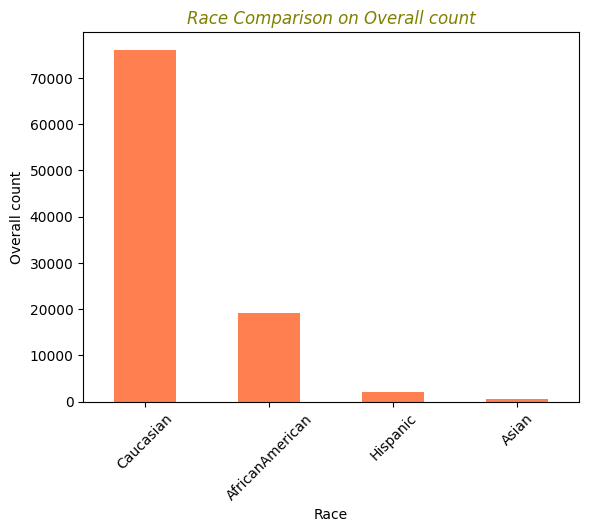

In [13]:
#Plot of data by race

df1['race'].value_counts() \
.head(10) \
.plot(kind='bar', xlabel = 'Race', rot=45,
      ylabel = 'Overall count', color = 'coral')
plt.title('Race Comparison on Overall count' \
          , loc='center', color='olive', style='italic')
plt.show()

In [14]:
#Count of both those on diabetes medication and those who are not

df1['diabetesMed'].value_counts()

diabetesMed
Yes    75274
No     22713
Name: count, dtype: int64

In [15]:
#####Count related to diabetes medication, by gender--- taking a general look at data

df1.groupby(['gender'])['diabetesMed'].count()

gender
Female    52827
Male      45160
Name: diabetesMed, dtype: int64

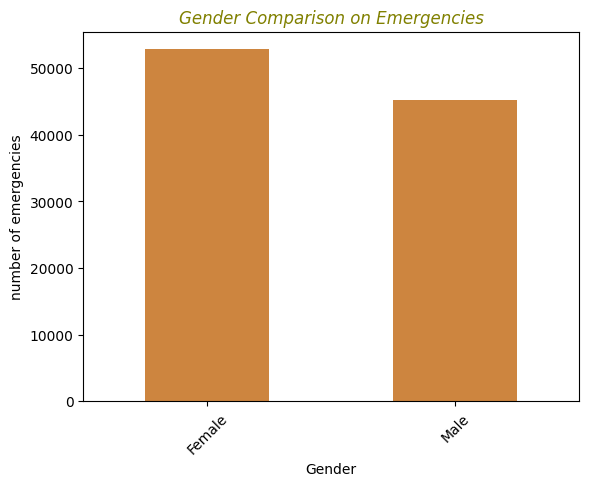

In [16]:
#Plot of numbers of emergencies, by gender

df1['gender'].value_counts() \
.head(10) \
.plot(kind='bar', xlabel = 'Gender', rot=45,
      ylabel = 'number of emergencies', color = 'peru')
plt.title('Gender Comparison on Emergencies' \
          , loc='center', color='olive', style='italic')
plt.show()

In [17]:
#Diabetes Medication distribution, by gender

diabetesMed_by_gender = df1.groupby(['gender', 'diabetesMed']).size().reset_index(name='count')

diabetesMed_by_gender

,gender,diabetesMed,count
0,Female,No,12553
1,Female,Yes,40274
2,Male,No,10160
3,Male,Yes,35000


<ipython-input-18-f0451ce2febd>:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:orange_r'` for the same effect.

  sns.barplot(x='gender',y='count', hue='diabetesMed' \


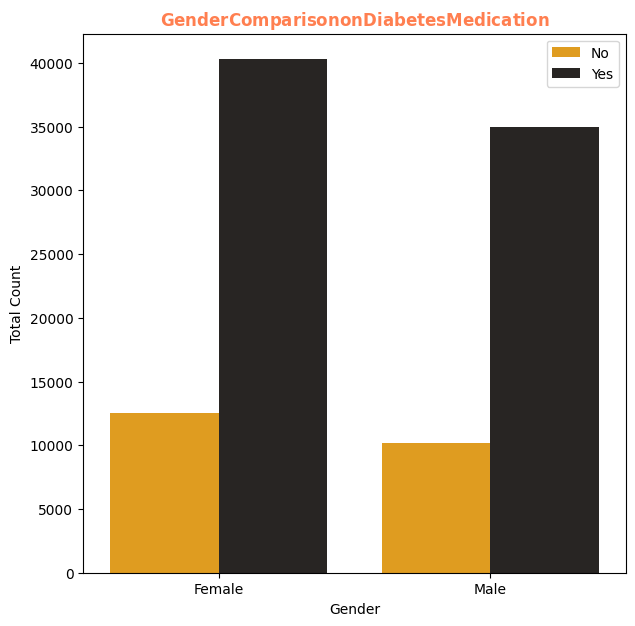

In [18]:
###Visualization of data on Diabetes medication, by gender

plt.figure(figsize=(7,7))
sns.barplot(x='gender',y='count', hue='diabetesMed' \
            , data=diabetesMed_by_gender,color='orange_r')
plt.title('$\mathbf{Gender Comparison on Diabetes Medication}$' \
          , loc='center', color='coral')
plt.xlabel('Gender')
plt.ylabel('Total Count')
plt.legend(loc='upper right')

plt.show()

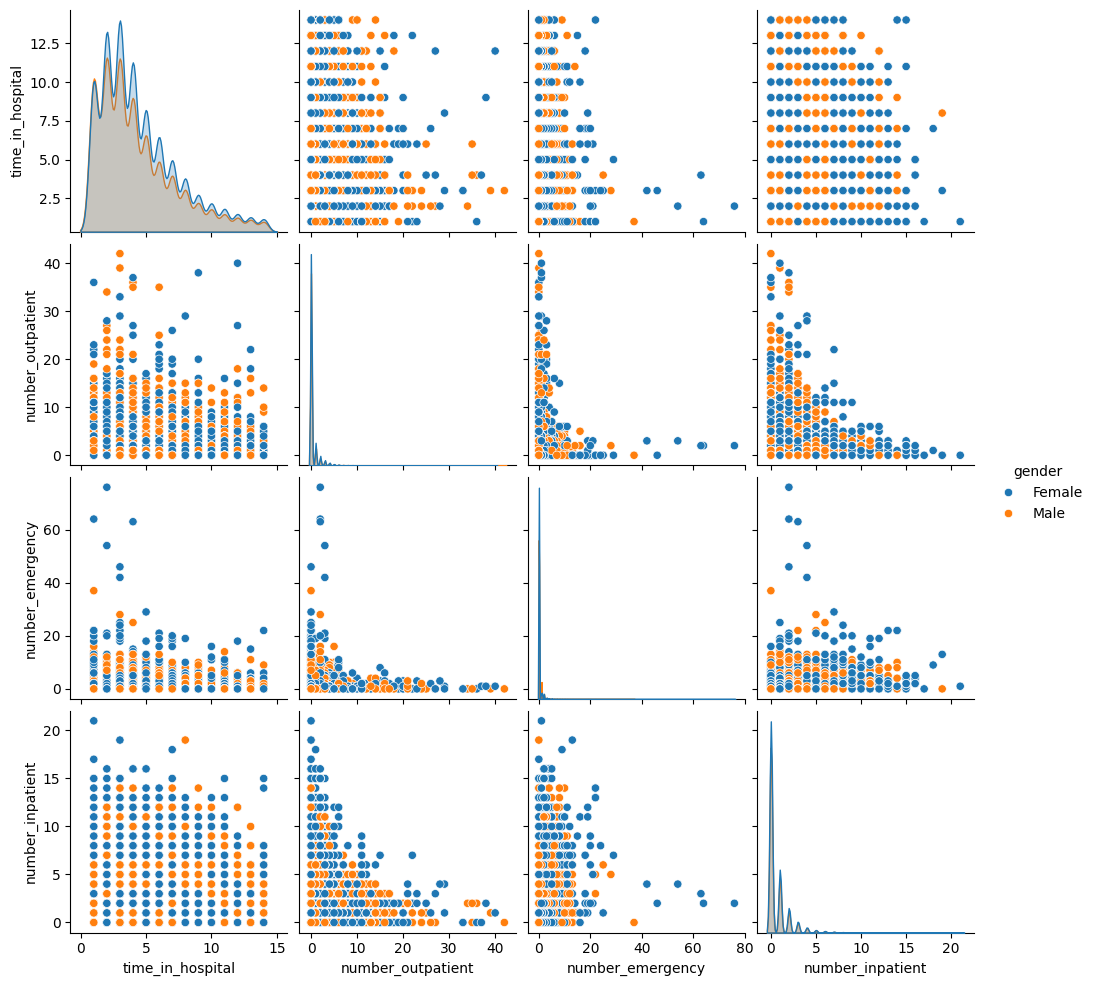

In [19]:
#Visualization on overall data

sns.pairplot(df1, hue='gender')

In [20]:
#Diabetes Medication distribution, by race

diabetesMed_by_race = df1.groupby(['race', 'diabetesMed']).size().reset_index(name='count')

diabetesMed_by_race

,race,diabetesMed,count
0,AfricanAmerican,No,4412
1,AfricanAmerican,Yes,14798
2,Asian,No,166
3,Asian,Yes,475
4,Caucasian,No,17649
5,Caucasian,Yes,58450
6,Hispanic,No,486
7,Hispanic,Yes,1551


<ipython-input-21-7cd1ea70bc82>:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:yellowgreen'` for the same effect.

  sns.barplot(x='race',y='count', hue='diabetesMed' \


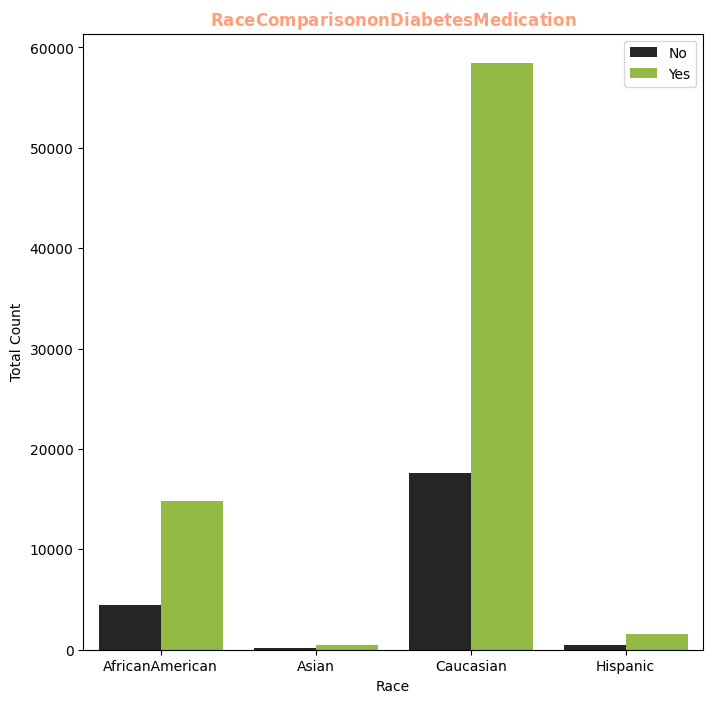

In [21]:
###Visualization of data on Diabetes medication, by Race

plt.figure(figsize=(8,8))
sns.barplot(x='race',y='count', hue='diabetesMed' \
            , data=diabetesMed_by_race,color='yellowgreen')
plt.title('$\mathbf{Race Comparison on Diabetes Medication}$' \
          , loc='center', color='lightsalmon')
plt.xlabel('Race')
plt.ylabel('Total Count')
plt.legend(loc='upper right')

plt.show()

In [22]:
# Total Count by gender

df1['gender'].value_counts()

gender
Female    52827
Male      45160
Name: count, dtype: int64

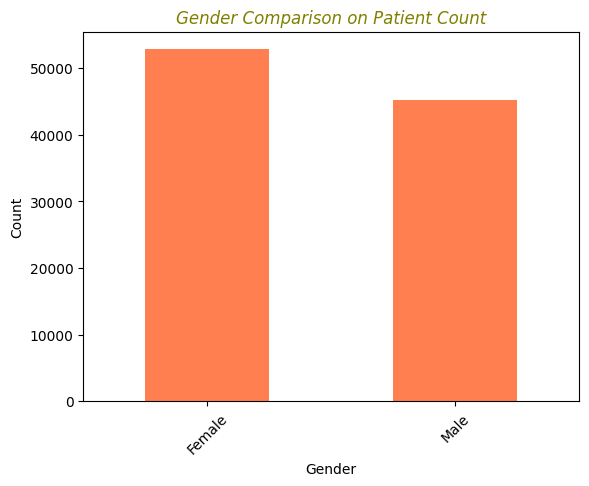

In [23]:
#Plot of data by Gender

df1['gender'].value_counts() \
.head(10) \
.plot(kind='bar', xlabel = 'Gender',
      ylabel = 'Count', color = 'coral', rot=45)
plt.title('Gender Comparison on Patient Count' \
          , loc='center', color='olive', style='italic')
plt.show()

Analysis shows that more females are on diabetes medication compared to males. Data also shows that majority on diabetes medication are Caucasians. There are more female counts for number of emergencies and in overall patient count. Caucasians have the highest count by race, in overall data set.